In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

In [4]:
xtrain= pd.read_csv('xtrain.csv')
ytrain= pd.read_csv('ytrain.csv')

xtest= pd.read_csv('xtest.csv')
ytest= pd.read_csv('ytest.csv')

xtrain.drop(columns=['Fence','FireplaceQu'], inplace=True)
xtest.drop(columns=['Fence','FireplaceQu'], inplace=True)



#getting the feature


features= pd.read_csv('selected_features.csv')
features= features['0'].to_list()  # '0' means the column name as we save the original file as index= False
features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'GarageYrBltna']

In [42]:
xtrain= xtrain[features]
xtest=xtest[features]

In [43]:
lin_model= Lasso(alpha=0.001, random_state=0)

# train model

lin_model.fit(xtrain,ytrain)

Lasso(alpha=0.001, random_state=0)

In [44]:
from sklearn.metrics import root_mean_squared_error

In [45]:
#the Sale price was log transformed earlier, hence we will change it back before evaluating the predictions
#checking for training set

pred= lin_model.predict(xtrain)

print('train_mse: {}'.format(mean_squared_error(np.exp(ytrain), np.exp(pred))))

print('train_mse: {}'.format(root_mean_squared_error(np.exp(ytrain), np.exp(pred))))

print('train_rmse: {}'.format(r2_score(np.exp(ytrain), np.exp(pred))))

train_mse: 626433278.1183596
train_mse: 25028.649146894837
train_rmse: 0.8982560778336497


In [46]:
xtest.fillna(0, inplace=True)

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_33335/3289162318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest.fillna(0, inplace=True)


In [47]:
pred= lin_model.predict(xtest)

print('test_mse: {}'.format(mean_squared_error(np.exp(ytest), np.exp(pred))))

print('test_mse: {}'.format(root_mean_squared_error(np.exp(ytest), np.exp(pred))))

print('test_rmse: {}'.format(r2_score(np.exp(ytest), np.exp(pred))))

test_mse: 19645692652.013287
test_mse: 140163.0930452567
test_rmse: -1.8447899613249046


In [48]:
print('Average house price: ', int(np.exp(ytrain).median()))

Average house price:  163000


/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_33335/115155779.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Average house price: ', int(np.exp(ytrain).median()))


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

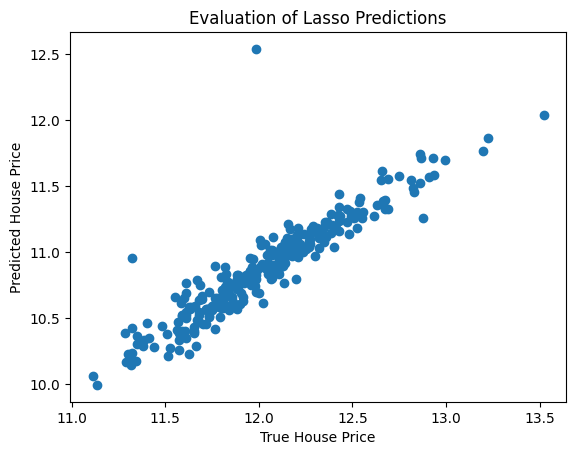

In [49]:
plt.scatter(ytest, lin_model.predict(xtest))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [50]:
ytest.reset_index(drop= True)

,SalePrice
0,12.209188
1,11.798104
2,11.608236
3,12.165251
4,11.385092
...,...
287,12.688499
288,13.226723
289,11.820410
290,11.320554


In [51]:
preds= pd.Series(lin_model.predict(xtest))
preds

0      11.123958
1      10.814432
2      10.526695
3      11.173339
4      10.332539
         ...    
287    11.331748
288    11.869759
289    10.885971
290    10.238306
291    10.275770
Length: 292, dtype: float64

In [52]:
errors= ytest['SalePrice']-preds

In [53]:
errors

0      1.085230
1      0.983673
2      1.081541
3      0.991912
4      1.052554
         ...   
287    1.356751
288    1.356964
289    0.934440
290    1.082248
291    1.247106
Length: 292, dtype: float64

(0.8, 1.5)

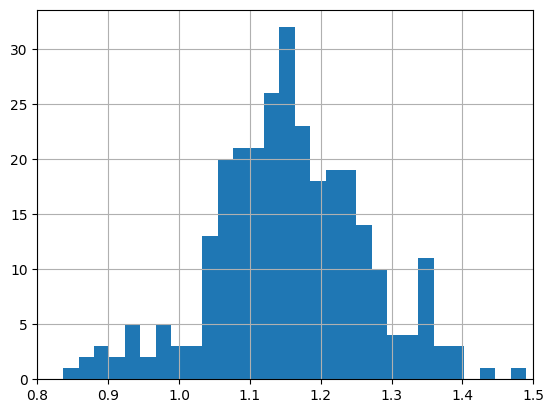

In [54]:
errors.hist(bins=100)
plt.xlim(0.8,1.5)

In [55]:
features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'GarageYrBltna']

Text(0.5, 1.0, 'Feature Importance')

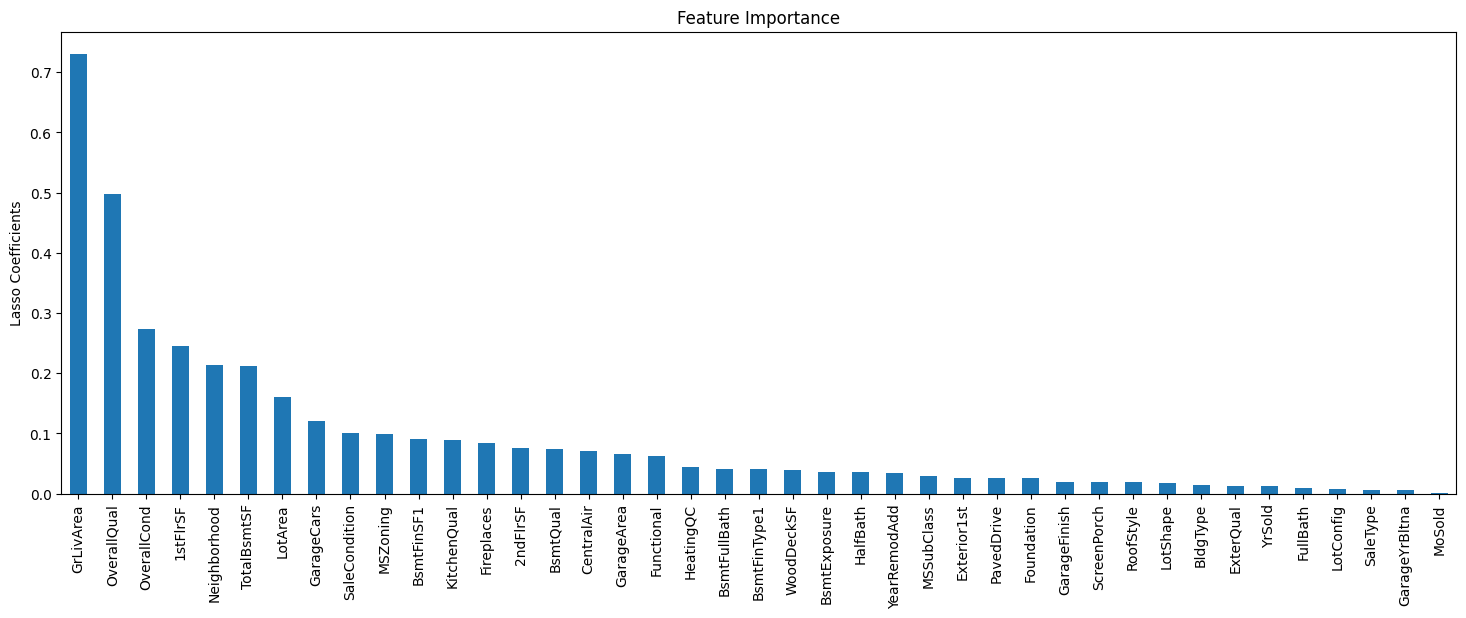

In [56]:
#getting the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')


In [58]:
import joblib

In [59]:
joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']